# Week 1: MLP with PyTorch — XOR

Replicate the NumPy implementation using PyTorch modules and autograd. Compare loss curves and predictions against `01_mlp_xor.ipynb`.


epoch= 100 loss=0.6871
epoch= 200 loss=0.6737
epoch= 300 loss=0.6375
epoch= 400 loss=0.5542
epoch= 500 loss=0.4222
epoch= 600 loss=0.2857
epoch= 700 loss=0.1877
epoch= 800 loss=0.1290
epoch= 900 loss=0.0942
epoch=1000 loss=0.0724
epoch=1100 loss=0.0579
epoch=1200 loss=0.0478
epoch=1300 loss=0.0404
epoch=1400 loss=0.0348
epoch=1500 loss=0.0304
epoch=1600 loss=0.0269
epoch=1700 loss=0.0241
epoch=1800 loss=0.0218
epoch=1900 loss=0.0198
epoch=2000 loss=0.0181

Predictions (probabilities):
 [[0.01813778]
 [0.98320466]
 [0.98409766]
 [0.02093313]]
Binary predictions: [0, 1, 1, 0]


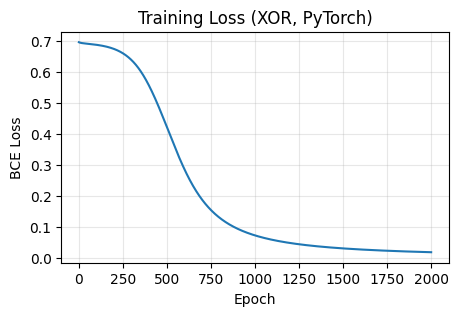

In [2]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Data
X = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y = torch.tensor([[0.0], [1.0], [1.0], [0.0]])

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Model
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.Tanh(),
    nn.Linear(8, 1),
    nn.Sigmoid(),
)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

losses = []
num_epochs = 2000
for epoch in range(num_epochs):
    for xb, yb in loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"epoch={epoch+1:4d} loss={loss.item():.4f}")

with torch.no_grad():
    probs = model(X)
    binary = (probs > 0.5).int().view(-1).tolist()
    print("\nPredictions (probabilities):\n", probs.numpy())
    print("Binary predictions:", binary)

plt.figure(figsize=(5, 3))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")
plt.title("Training Loss (XOR, PyTorch)")
plt.grid(True, alpha=0.3)
plt.show()
